<function matplotlib.pyplot.show(close=None, block=None)>

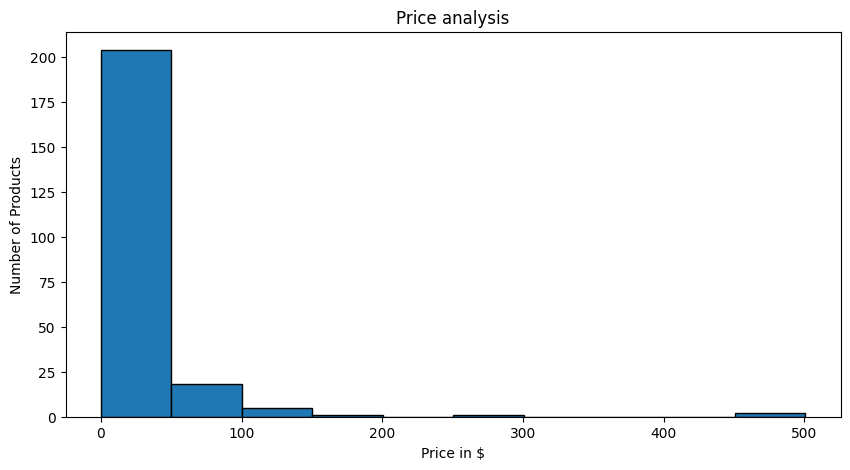

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("/Users/samenergy/Documents/Projects/peer-group-5-webscraping/ebay_cars.csv")

def clean_price(price):
    price = price.replace("$","")
    if "to" in price:
        try:
            low,high = map(float, price.split("to"))
            return (low+high)/2
        except ValueError:
            return None
    else:
        try:
            return float(price)
        except ValueError:
            return None

df["price"]= df["price"].astype(str).apply(clean_price)

df=df.dropna(subset=["price"])

plt.figure(figsize=(10, 5))
plt.hist(df["price"], bins=10, edgecolor="black")
plt.xlabel("Price in $")
plt.ylabel("Number of Products")
plt.title("Price analysis")
plt.show
    